## Importing Necessary Libraries

In [1]:
#Import the necessary libraries
import cPickle
from sklearn.ensemble import RandomForestClassifier
from sklearn import grid_search
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print "hello"

hello


## Functions to Read in the data and split it into test and train

In [2]:
#Function to unpickle the image files and return the CIFAR dictionary containing the data and the labels
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

In [3]:
def split_test_train(cifar_data, seed_val):
    '''This function takes in one of the cifar datasets and randomly splits the data into test (20%) and train (80%).
    It returns a dictionary with four data structures:
    1. train_data (numpy array)
    2. train_labels (list)
    3. test_data (numpy array)
    4. test_labels (list)'''
    
    from numpy.random import seed

    #set a seed and randomly split into training and test
    seed(seed_val)
    
    #Get the data and labels
    all_data = cifar_data['data']
    all_labels = cifar_data['labels']
    
    #Randomly sample indexes from the data
    indexes = np.random.choice(len(all_data), size = len(all_data), replace = False)
    
    #Split into Test and Train
    train_amount = int(round(0.8 * len(indexes)))
    train_data = all_data[indexes[:train_amount]]
    train_labels = [all_labels[i] for i in indexes[:train_amount]]
    test_data = all_data[indexes[train_amount:]]
    test_labels = [all_labels[i] for i in indexes[train_amount:]]
    
    print "here"
    
    #Put it all in a dictionary and return the dictionary
    split_data = {"train_data": train_data, "train_labels": train_labels, "test_data": test_data, "test_labels": test_labels}
    return split_data

## Reading in the first two batches of cifar-10 data and splitting into test and train

In [4]:
#Read in the first two batches of data (the batch must reside in a folder called 'data' that resides in the parent folder of the current directory)
#The pickle file contains two elements --> 'data' (numpy array) and 'labels' (numeric list)
batch1 = unpickle("data/data_batch_1")
batch2 = unpickle("data/data_batch_2")

#Read in the label names for these images
label_names = unpickle("data/batches.meta")

#Note: I'm splitting these up individually and then combining them (rather than combining them and then splitting them up)
#simply because I already have the code written to do it this way...
split_data1 = split_test_train(batch1, 4)
split_data2 = split_test_train(batch2, 5)

#Concatenate the two data sets
all_train_data = np.concatenate((split_data1['train_data'], split_data2['train_data']), axis = 0)
all_train_labels = split_data1['train_labels'] + split_data2['train_labels']
all_test_data = np.concatenate((split_data1['test_data'], split_data2['test_data']), axis = 0)
all_test_labels = split_data1['test_labels'] + split_data2['test_labels']

here
here


## Running the RF with the optimized hyper-parameters over the non-pre-processed data (takes about 5 minutes to run on my computer)

In [5]:
#Here is the random forest run with they ideal hyperparameters (obtained from a 'grid search' cross-validation)
new_rf2 = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, min_samples_split=2)
new_rf2.fit(all_train_data, all_train_labels)
print 'Accuracy on test data:', round(new_rf2.score(all_test_data, all_test_labels), 3) * 100

Accuracy on test data: 46.6


## Here's a function to visualize the images with matplotlib from their native format: May be useful when developing our UI

In [18]:
#Lets write a function to visualize these images
#To visualize, the images need to be in a l x w x 3 format for matplotlib
def visualize_image(raw_row_array, im_len, im_height):
    
    #Separate out the Red, Green, and Blue portions of the pixels
    red_array = raw_row_array[:1024]
    green_array = raw_row_array[1024:2048]
    blue_array = raw_row_array[2048:]
    
    #Initialize a list to store the rgb triplets
    pixel_group_list = list()
    
    #Group the RGBs together
    for i in range(len(red_array)):
        pixel_group_list.append([red_array[i], green_array[i], blue_array[i]])
    
    #Convert them back to a numpy array
    pixel_group_array = np.asarray(pixel_group_list)
    
    #Reshape the array so that it plays nicely with matplotlib
    final_pic = pixel_group_array.reshape(im_len, im_height, 3)
    
    #print the picture
    plt.imshow(final_pic)
    plt.show()

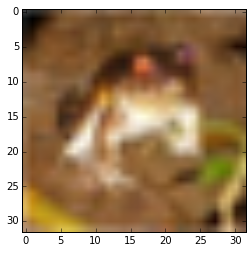

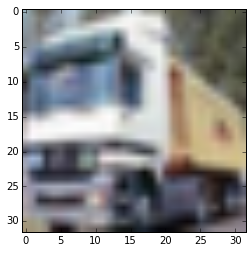

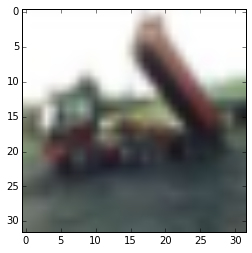

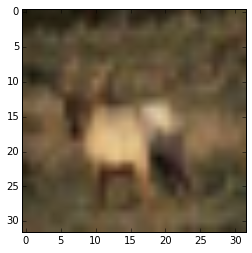

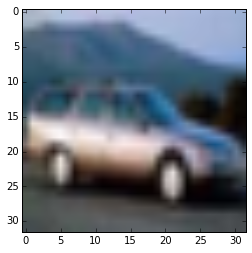

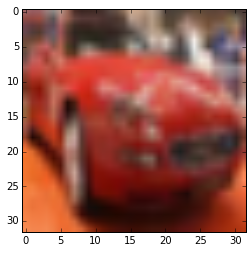

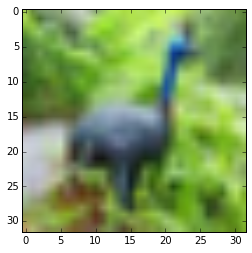

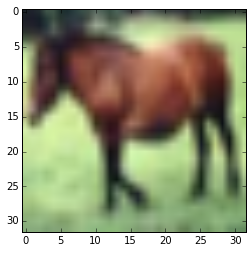

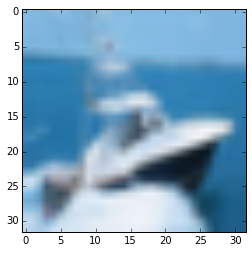

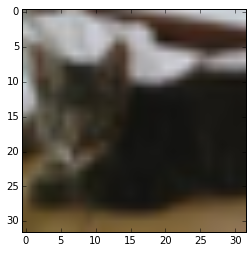

In [19]:
#Testing the visualization
for i in range(10):
    visualize_image(batch1['data'][i], 32, 32)